# Data Visualization with Python (and auto generated Javascript)

<div id="contents"> </div> 

## Contents 

 1. [General Theory](#theory) 
    
    1. [Review of Data Types](#data-types)
       
    1. [Key visual attributes](#visual-attribs)
    
    1. [Design criteria](#design-criteria)
    
 2. [Making plots with matplotlib](#matplotlib)
  
 3. [Interactive graphs in the web with Bokeh](#bokeh)
 
 4. [Summary: Visualization DO's and DON'Ts](#dos-donts) 
 
 5. [Final Challenge](#final-challenge) 
 
 4. [References](#references)

<div id="theory">

## 1. General Theory 


**Definition.** Visualization:  The visual representation of information. 

**Goals:**

- Effective **communication** of information 
- **Clarity:** Easity to understand by a human
- **Integrity:** Present all the data and nothing but the data.
- Stimulate **viewer engagement**

**Why**

Takes advantage of the fact that the **human visual system is the highest bandwith channel** to the human brain.
It takes fractions of a second to look at a computer screen that literally is outputing _millions of bits_ of information.

### Data Visualization Methodology 

Data visualization at its core is no more than encoding _data attributes_ as _visual attributes_.
This involves 2 steps: 

  1. Classify data types
  2. Determine which visual attributes represent data types most effectively.

<div id="data-types"> </div>

### A. Review of Data types


| **Data Type**          | **Example (s)**      | Operations supported                           | Notes                   |
|------------------------|----------------------|------------------------------------------------|-------------------------|
| Categorical - Nominal  | Genders (M, F, ...)  | `==`, `!=` (equality/inequality comparison)    |                         |
| Categorical - Ordered  | Education Level      | `==`, `!=`, `<`, (order comparison)          | There is a notion of better |
| Quantitive - Interval  |   Date, Latitude     |  `==`, `!=`, `<`, `-`                          | Zero is arbitrary       |
| Quantitive - Ratio     |   Counts, Weights    |  `==`, `!=`, `<`, `-`, `/`                     | The zero is meaningful  |


<div id="visual-attribs"> </div>
    
### B. Key visual attributes 

 The following are key visual attributes and their applicability to encode different types of variables 
 ( Convention: **&#10004;** applies very well, &#10003; applies OK ) 
 
 
 | Visual attribute   | Nominal      | Ordered      | Quantitative |
 |--------------------|--------------|--------------|-----------|
 | Position           | **&#10004;** | **&#10004;** | **&#10004;**  |
 | Size (length, area, volume) | **&#10004;** | **&#10004;** | **&#10004;**  | 
 | Value (Lightness)  | **&#10004;** | **&#10004;** | &#10003;  |
 | Texture            | **&#10004;** |  &#10003;    |           |
 | Color              | **&#10004;** |  &#10003;    |           |
 | Orientation        | **&#10004;** | 
 | Shape              | **&#10004;** |


**Notes** 

Value (Lightness) works well for encoding ordered attributes: 
<img src="value_ordered.png" /> 


Value (Lightness) works but not as well,  for encoding continuous quantitative attributes:
<img src="value_continuous.png" /> 


## How accurate is human perception for different attributes 

<img src="perception_accuracy.jpg" width="640px" height="640px"/> 

Let's see this in action.

<img src="angles_vs_lengths.png" width="640px" height="480px" /> 



**Moral of the story**: Represent the most important variables by positions or lengths and then go down the ladder!

[Back to contents](#contents)

<div id="design-criteria"> </div>

## C. Design criteria

### Effectiveness

  - Fast to interpret for the viewer
  - More distinctions
  - Fewer errors of interpretation
  
  
### Expressiveness / Consistency

   - Encode _all_ the facts in the data and _only_ the facts 

### Example of an incorrect use of a bar chart...

<img src="incorrect_bar_chart.png" /> 

### 3D plots are cool, but... 

Can you tell where $E$ is relative to $D$?

<img src="scatter_3d.png" /> 

Here is a less cool but clearer alternative: 

<img src="scatter_3d_alternative.png/" >


### What's wrong with this one? 

<img src="pie_3D_exploded.png" /> 

### What's wrong with the following plot? 
<img src="lying_3D.png" width="400px" height="600px"/> 


### Moral of the story: beware of 3D plots!
 
 [back to contents](#contents) 

## Matplotlib

Key points about matplotlib 

  - Probably the **oldest, most mature, extended and well understood**  data visualization library 
  - It belongs to the [PyData](https://pydata.org/downloads/) suite of libraries (together with `numpy`, `scipy`, `scikit-learn` and `pandas`)  
  - The interface and look is heavily inspired in **Matlab's graphics functions**
  - Its API follows a **procedural style**: one creates a plot and then adds elements to it, such as other data series, text labels, etc. This is opposed to the declarative style of creating graphics of other libraries which we will see below.
  - The data manipulation library **pandas** uses matplotlib as its graphics backend.
  - Doesn't produce the best / coolest looking plots out of the box. Significant fiddling is required for that...



### Basic 2D line-plot with matplotlib 

In [2]:
# The following magic directive instructs the notebook to insert plots generated by matplotlib directly in the notebook
# It is necessary for some versions of Jupyter notebook
%matplotlib inline

import numpy as np  # numpy is the default python library for working with vectors and matrices
from matplotlib import pyplot as plt 
# This is a very standard import line.
# It is an extended convention to alias the pyplot (sub)module as 'plt'

In [3]:
# Now we use numpy to generate some random data
# random points as two one dimensional arrays
x1 = np.linspace( -1.5, 1.5, num=20) # this creates a series of 20 uniformly spaced points between -1.5 and 1.5
y1 = ( x1 - 1.0 ) * x1 * ( x1 +  1.0) # we compute a cubic function of x in a vectorized way!

# Inspect what we just produced
type(x1), x1.shape, type(y1), y1.shape

(numpy.ndarray, (20,), numpy.ndarray, (20,))

matplotlib.axes._subplots.AxesSubplot

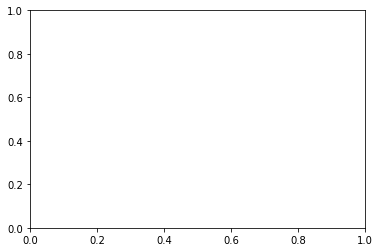

In [7]:
fig, ax  = plt.subplots()
type( ax )

Text(0.5, 0, 'My x axis')

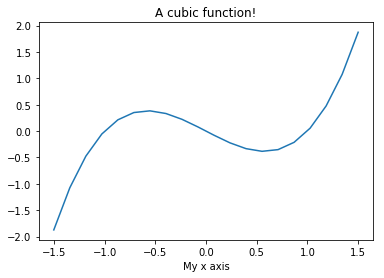

In [10]:
fig, ax  = plt.subplots()
ax.plot( x1, y1 )
ax.set_title( 'A cubic function!')
ax.set_xlabel( 'My x axis') # Always, always, always label your axes!


**Exercise 1:**

Put a label in on the y-axis. Guess the command for this. If you can't guess, look in the internet.

### Styling your plot with a format string

A quick way to specify styling information (such as color, line style and marker type) is to add a **format string** argument to the call to `plt.plot`, like so:  

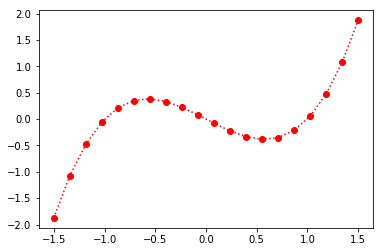

In [11]:
fig, ax  = plt.subplots()
ax.plot( x1, y1, 'ro:' )


Here is a summary of what you need to know about format strings: 
  - The first character in the format string, controls the **color** (of both the line and the markers). There are eight single letter colors that can be specified with a single character (see [here](https://matplotlib.org/examples/color/named_colors.html) or [here](https://matplotlib.org/2.0.2/api/colors_api.html) for details). To access the whole RGB color spectrum, you can us the separate argument `color` (see below) 
  - The second che second character is the shape of the **marker** (filled circles in this case, one for each original point). All possibilities for markers are documented [here](https://matplotlib.org/api/markers_api.html)
  - The third controls the style of the line connecting markers: https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html

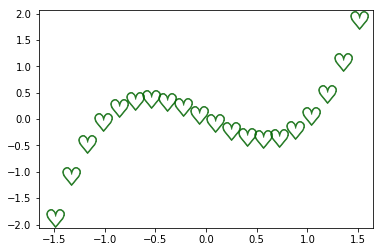

In [18]:
# Example: Using optional arguments color, linestyle, fillstyle, markersize, etc.
# More control requires more typing ... There is no way around it!
fig, ax = plt.subplots() 
ax.plot( x1, y1, 
         color='DarkGreen', # for a list of named colors go here: https://matplotlib.org/examples/color/named_colors.html
         marker='$\heartsuit$',  # This uses TeX control sequences to specify the marker...
         markersize=20,
         alpha=0.7, # a bit of transparency          
         linestyle='none', # No line connecting the markers
         )

### Vertical Bars

A simple bar plot can be produced like so.

In [ ]:
fig, ax = plt.subplots() 

x2 = np.arange(0, len(y1)) # just an array [0, 1, 2, ..., len(y) - 1]

ax.set_xticks( x2[::2] ) # put ticks every other value of x...
ax.set_yticks( np.linspace(-2, 2, num=5) )

ax.bar( x2, y1, width=0.8, 
        color='SkyBlue', 
        edgecolor='DarkBlue',
        linewidth=2 # width of the bar edges. Should be 'edgewidth' but such is life.... 
      )


**Exercise:**

In the code cell below complete the code to produce a chart like the following: 

<img src="avg_scores_women_men.png" />

In [ ]:
women_means = (20, 35, 30, 35, 27)
men_means = (25, 32, 34, 20, 25)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars
### Your code below this line
# Hint you can call ax.bar( ... ) twice, once for women and once for men 




### Your code above this line. No need to touch the following
ax.set_ylabel('Avg. Scores')
ax.set_title('Avg. Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

### Horizontal Bars

In [ ]:
fig, ax = plt.subplots( figsize=(6,10) ) # set figure size in inches :( 

xh = np.arange( 0, 17 ) 
yh = abs(y1)[:17] * 50 

ax.set_yticks( xh )
states = [ 'Antioquia', 'Bolivar', 'Caldas', 'Magdalena', 'Cundinamarca', 
           'Cesar', 'Córdoba', 'Arauca', 'Amazonas', 'Guanía', 'Putumayo', 'Santander', 'Tolima', 'Huila', 
           'Boyacá', 'Choco', 'Nariño']
ax.set_yticklabels( states ) 
ax.barh( xh, yh, 
         color='mediumseagreen', 
         edgecolor='darkgreen', 
         linewidth=2 # width of the bar edges. Should be 'edgewidth' but such is life....
       )

ax.set_xlabel('Percentage of cool developers')


## Pie plots

Some of the simplest kinds of plots. For that reason they are pretty much on every dashboard...


In [ ]:
fig, ax = plt.subplots( figsize=(10,8)) 

n_slices = 10 
np.random.seed( 1337 )
slice_sizes = np.random.uniform( 0, 10, n_slices ) 
print( "slice_sizes = %s" % slice_sizes )
# assignment to token variable _ is a trick to avoid seen some trash output
_ = ax.pie( slice_sizes, 
            labels=states[:n_slices], 
            autopct="%.1f%%",
            shadow=True # a touch of 'fine coquetteness'            
          ) 

**Exercise:** 
The choice of colors of the line above leave much to be desired... 
The situation can be improved considerably by simply using one of the predesigned colormaps.
As shown below. 

Experiment using other colormap names instead of `'tab20c'` used below. 
For available colormaps go here: 

https://matplotlib.org/examples/color/colormaps_reference.html


In [ ]:
fig, ax = plt.subplots( figsize=(10,8)) 

n_slices = 10 
np.random.seed( 1337 )
slice_sizes = np.random.uniform( 0, 10, n_slices ) 

color_map = plt.get_cmap('tab20c')

_ = ax.pie( slice_sizes, 
            labels=states[:n_slices], 
            autopct="%.1f%%", #controls the formatting of the string that shows the percentage, e.g. '11.2%'
            shadow=True,  # a touch of 'fine coquetteness',
            colors = color_map.colors   
          ) 

Let's take a brief look at what color_map.colors actually holds...

In [ ]:
color_map.colors[ :5 ]

**Conclusion:** You can define your own list of colors, as a list of `(r,g,b)`-tuples where each of `r`, `b` and `g` are in the interval `[0.0, 1.0]`, `1.0` translates to 255 in the regular RGB scale. However, bear in mind that defining a nice colormap is a tricky business, better left to professionals... Unless you are a graphic design Ninja, go with one of the predefined ones (just avoid the deafault which, as we have seen, is pretty jucky!) 

### A scatter plot

Scatter plots are somewhat similar to regular 2D plots, except that they should be preferred when the relationshiop between the two main variables is not a simple function or there is significant randomness involved. 


In [ ]:
fig, ax = plt.subplots( figsize=(10,7) )

num_points = 500 
xs = np.linspace( 0, 1, num_points )
# A trend plus some noise. Recall ** stands for exponentiation in python:
ys = ( xs - 0.3 ) ** 2 + np.random.normal( 0, 0.1, num_points )  

ax.scatter( xs, ys,
            s = 4, # this controls the size (in 'points', by default graphs are produced at 72 dpi) 
            color='green' ) 

**Exercise: Adding a trend line**

Copy the code from the previous code cell into the empty cell below and add
the following two lines, just before the call to scatter.


In [ ]:
ys_trend = (xs - 0.3) ** 2 
ax.plot( xs, ys_trend, 'r-')

In [ ]:
#Empty box....



In [19]:
fig.savefig( "scatter_and_trend.png" )  # beware the this will save the figure last assigned to variable 'fig'

**Exercise: Colorblind-awareness** 

The previous plot is not very nice to (some) color-blind people who confuse red and green. To see this, save the plot to a  
file with the `savefig` command shown below, then go to  https://www.color-blindness.com/coblis-color-blindness-simulator/, upload the file, and pick either 'Protanopia', 'Deuteranopia'. What do you notice? 

Now redo the plot above with orange points (use color = 'orangered' for better contrast) and a blue line.  Save it to `'scatter_trend_v2.png'`

<img src="scatter_colorblind.png" width="480px" height="240px" />


In [ ]:
#Your code:





### Bubble plots

Bubble plots are simple variation of scatter plots in which we represent another dimension (variable) through the size of each marker

In [ ]:
# Import some data. 
# Data was taken from 
# https://raw.githubusercontent.com/armando-fandango/Python-Data-Analysis/master/Chapter03/WHO_first9cols.csv

import pandas as pd
df0 = pd.read_csv( 'WHO_first9cols.csv')
# redefine column names for more pleasant coding
df0  # a cursory look a the data 

In [ ]:
df0.columns = ['country',
 'country_id',
 'continent',
 'adolescent_fertility',
 'literacy_rate',
 'gross_income_pc',
 'prim_enrolment_fema',
 'prim_enrolment_male',
 'population']

In [ ]:
num_countries = 20
df = df0.sort_values( 'population', ascending=False )
df = df[:num_countries] # Filter 30 biggest countries 
df = df[ ~df['population'].isna() & ~df['gross_income_pc'].isna() & ~df['literacy_rate'].isna() ]

In [ ]:
df

In [ ]:
fig, ax = plt.subplots( figsize=(10,7) )

ax.scatter( df['literacy_rate'], 
            df['gross_income_pc'], 
            s = df['population'] / 100.0, # this controls the size (in pixels) -- could be an array, see below
            alpha = 0.5, 
            color='darkorchid' )

## This is how to add text labels at specific points in a plot!
for i in range( len(df) ):
    ax.text( x= df['literacy_rate'].iloc[i], y=df['gross_income_pc'].iloc[i], s=df['country'].iloc[i])

ax.set_title( 'A bubble plot exploring the (somewhat weak)\n relation between literacy and income',
              fontsize=20)
ax.set_xlabel( 'Adult Literacy rate [%]') 
ax.set_ylabel( 'Gross national income per capita (USD)')
#ax.set_subtitle( 'Bubble size represents population' )

**Reflection**

In the graph above, does it look that the _radius_ of India's bubble is the 11 times that of Mexico's. Should be so? Look at the `help( ax.scatter )`  to see what the size parameter `s` actually controls. Why is it so? 


**Exercise:** Encoding 4 variables at once!
    
The previous plot show how it is easy possible to encode 3 variables at once
(adult literacy rate, income, and population) through different attributes (x-pos, y-pos, and bubble size, respectively).  

This exercise is visualizing one more variable, for a total of 4 at the same time.

**Your mission** (to be accomplished in the next code cell) is to color each bubble according to the column `df['continent']`*

Notice that, although represented by a number, `continent` is really a categorical or quantitative variable (continents have no intrinsic order). 
Thus you need to choose a color map accordingly. 

Here are the built-in colormaps: https://matplotlib.org/examples/color/colormaps_reference.html

The final plot should look like the following:
<img src="colored_bubbles1.png" width="500px" height="350px" />

Note: The particular choice of colors is not important. The important thing is that countries belonging to the same continent are represented by the same color and countries in different.

In [ ]:
color_map = None #YOUR CODE HERE: Change None to code that gets a color map here. Hint: Use plt.get_cmap as was done in an exercise above

fig, ax = plt.subplots( figsize=(10,7) )

ax.scatter( df['literacy_rate'], 
            df['gross_income_pc'], 
            s = df['population'] / 100.0, # this controls the size (in pixels) -- could be an array, see below
            color = None, # YOUR CODE HERE: use your color map here to get colors. 
                          # HINT: a color map can be called, even on a whole vector/column of data, as it if were a function... 
                          # For more info see: https://matplotlib.org/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py
           
            alpha = None # YOUR CODE HERE: make sure to use a value of alpha that doesn't cause any funny blending of colors 
                        # that might confuse the chart's consumer...
          )

## This is how to add text labels at specific points in a plot!
for i in range( len(df) ):
    ax.text( x=df['literacy_rate'].iloc[i], 
             y=df['gross_income_pc'].iloc[i], s=df['country'].iloc[i])

ax.set_title( 'A bubble plot exploring the (somewhat weak)\n relation between literacy and income',
              fontsize=20)
ax.set_xlabel( 'Adult Literacy rate [%]') 
ax.set_ylabel( 'Gross national income per capita (USD)')


[back to contents](#contents) 

<div id="bokeh"></div>


## Interactive and web-embedded plots with bokeh

In [23]:
import bokeh
from bokeh.plotting import figure, output_file, show, output_notebook, reset_output

In [ ]:
# IMPORTANT: You might need to run this cell twice for the plot to show!

output_notebook()
p = figure(title='Simple Line Example', x_axis_label='x', y_axis_label='y')
p.line( x1, y1, legend="Temp.", line_width=2)
show(p) 

In [ ]:
# Same example
reset_output( )
output_file( "line.html" )
p = figure(title='Simple Line Example now in self-contained file!', x_axis_label='x', y_axis_label='y')
p.line( x1, y1, legend="Temp.", line_width=2)
show(p)

In [ ]:
reset_output()
output_notebook() 

p = figure(plot_width=600, plot_height=400,
           title=None, toolbar_location="below")

p.circle( xs, ys, size=2, color='orangered' )
p.line( xs, ys_trend, color='blue' )
show( p )

## Bar plot

In [ ]:
p = figure(plot_width=600, plot_height=400,
           title=None, toolbar_location="right")

p.vbar( x=np.arange(0,len(y2)), top=y2, 
        width=1.0,  # bars' width
        color='firebrick', 
        alpha=0.8, 
        line_width=2,
        line_color='black')

show(p)

In [ ]:
from math import pi 

n_slices = 8
np.random.seed( 1337 )
slice_sizes = np.random.uniform( 0, 10, n_slices )  # Any set of random numbers
slice_angles = slice_sizes / sum( slice_sizes ) * 2 * pi   # Now they add up to 2*pi


In [ ]:
end_angles   = list( np.cumsum( slice_angles ) ) # take cummulative sums but drop the last one
start_angles = [ 0.0 ] + list( np.cumsum( slice_angles )[:-1] )  
# same as end-angles but drop the last one and push 0 at the beginning

list( zip( start_angles, end_angles ) ) 

In [ ]:
p = figure(plot_width=500, plot_height=500,
           title=None, toolbar_location="right")

p.xaxis.visible=False 
p.yaxis.visible=False
p.xgrid.visible=False
p.ygrid.visible=False

p.annular_wedge(            
    start_angle = start_angles,
    end_angle = end_angles,         
    inner_radius = 0.5, 
    outer_radius = 1.0,
    x=0, y=0,
    alpha=0.8, 
    line_width=0,
    line_color='black') 

show(p)

### Now  add labels to the slices

In [ ]:
r * np.cos(middle_angles), 

In [ ]:
help( p.add_layout )

<div id="annular-pie-plot"></div>

### Bokeh annular pie-plot v. 2.0 (adding colors and labels)

To add colors we import a paltette (dictionary) 

In [ ]:
from bokeh.palettes import Category20c

# Category20c  is dictionary (mapping) a number of elements n to a set of n colors 
# Example: 
Category20c[5]

In [ ]:
from bokeh.models import LabelSet 

p = figure(plot_width=500, plot_height=500,
           title=None, toolbar_location="right")

p.xaxis.visible=False 
p.yaxis.visible=False
p.xgrid.visible=False
p.ygrid.visible=False

p.annular_wedge(            
    start_angle = start_angles,
    end_angle = end_angles,         
    inner_radius = 0.5, 
    outer_radius = 1.0,
    color=Category20c[ len(start_angles) ],
    x=0, y=0,
    alpha=0.8, 
    line_width=0,
    line_color='black') 


r = 0.7 
middle_angles = ( np.array( start_angles )  + np.array( end_angles ) ) / 2.0 

# We create a 'DataSource' to get text strings and x,y coordinates to label the dataset.
labels_source = ColumnDataSource( {'x' : r * np.cos(middle_angles),
                                   'y' : r * np.sin(middle_angles),
                                   'text' : states[:n_slices] })

labels = LabelSet(x = 'x' , y =  'y', text = 'text', level='glyph',
                  source = labels_source,
                  x_offset=-3, y_offset=5) #, render_mode='canvas')

p.add_layout( labels, place='center' )

show(p)

### Bubble plot

In [ ]:
p = figure(plot_width=600, plot_height=400,
           title=None, toolbar_location="below")

p.circle( x=df['literacy_rate'], 
          y=df['gross_income_pc'], 
          size=df['population'] / 10000.0 , 
          alpha=0.5, 
          color='darkorchid' ) 


show( p )

**Exercise:**  set the axis labels in the previous plot.  Beware that this is not done in the same way as in matplolib. 
The API is a bit different! See how we did it in the previous bokeh example

**Exercise** Notice how the relative sizes of the bubbles are not the same as before... This is because bokeh takes the size argument as an indication of the _radius_ of the circle, not the area, as matplotlib does.

The solution is to apply the function `np.sqrt` to the argument passed to the parameter `size`. Do it!
Also play a little with the factor  `10000.0` we are dividing by, to get the sizes of the bubbles to approximately match what we had before.

### Now with Tooltips!

In [25]:
from bokeh.models import HoverTool, ColumnDataSource

output_file( 'bubbles.html' )
data_source = ColumnDataSource( {
  'literacy_rate' : df['literacy_rate'],
  'gross_income_pc' : df['gross_income_pc'],
  'country' :  df['country'],
  'population' : df['population'],
  'sqrt_population' : np.sqrt( df['population'] / 100.0 ),
  'adolescent_fertility' : df['adolescent_fertility'],
  'prim_enrolment_fema' : df['prim_enrolment_fema'],
  'prim_enrolment_male' : df['prim_enrolment_male'],    
} )

p = figure(plot_width=600, plot_height=400,
           title=None, toolbar_location="below",
           tools= "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"
          )

p.circle(x='literacy_rate', y='gross_income_pc', size='sqrt_population', 
         color='#ebbd5b', alpha=0.7,
         source=data_source)

p.add_tools(HoverTool(
    tooltips=[
        ( 'Country Name:',   '@country' ),
        ( 'Literacy Rate',   '@literacy_rate{%s}%'  ),
        ( 'Population',      '@{population}m'  ),
        ( 'Gross Income Per Capita',  '$@{gross_income_pc}{%0.0f} USD' ), 
        ( 'Primary Edu. Enrollment',  'M: @{prim_enrolment_fema}{%s}%, F: @{prim_enrolment_male}{%s}%' ), 
       
    ],

    formatters={        
        'literacy_rate'   : 'printf', 
        'gross_income_pc' : 'printf', 
            # use default 'numeral' formatter for other fields
    },
    # display a tooltip whenever the cursor is vertically in line with a glyph
    # mode='vline'
))

show(p)


NameError: name 'df' is not defined

Notice there are three new tools in the plot above. 

_Click on each to activate it and try it out!!_


 - **Lasso select**: (second position)  Let's you select a few of the bubbles.
 - **cross-hair**: shows vertical and horizontal lines to easily see what your $x$ and $y$ coordinates are.
 - **Hover**: displays tool tips / textual information about each bubble under your cursor.
 

### Changing parameters interactively!

In [26]:
from bokeh.layouts import widgetbox, Row
from bokeh.models.callbacks import CustomJS
from bokeh.models.widgets import Slider 

reset_output()
output_notebook()
#output_file("resizable_circle.html")


r0 = 0.1
l0 = 0.05
params = ColumnDataSource(data={'r' : [r0],
                                'l' : [l0],
                                 })
s = 0.01 * np.arange( 10000 );
source = ColumnDataSource(data={ 'x' : np.cos(s),
                                 'y' : np.sin(s) } )

common_code = """
    var data = source.data;
        
    var s = 0.0;
    var alpha = 0.0;
    var beta = 0.0;
    var gamma = 0.0;
    var x = data['x']
    var y = data['y']
    
    for (var i = 0; i < x.length; i++) {
        s = 0.01 * i; 
        alpha = s / ( 2 * Math.PI );
        beta  = s / ( 2 * Math.PI * r );
        gamma = alpha - beta;        
        
        x[i] = Math.cos(alpha) + l * Math.cos(gamma);
        y[i] = Math.sin(alpha) + l * Math.sin(gamma);
    }
    source.change.emit();
"""

callback_r = CustomJS(args=dict(source=source, params=params), code=f"""
    var r = cb_obj.value;
    var l = params.data['l'][0];
    params.data['r'][0]=r;
        
    {common_code}
""")

callback_l = CustomJS(args=dict(source=source, params=params), code=f"""

    var r = params.data['r'][0];        
    var l = cb_obj.value;
    params.data['l'][0]=l;
    
    {common_code}
""")

slider1 = Slider(start=0, end=0.5, value=r0, step=.001, title='r' )
slider1.js_on_change( "value", callback_r )

slider2 = Slider(start=0, end=2.0, value=l0, step=.01, title='l' )
slider2.js_on_change( "value", callback_l )


p = figure( width=700, height=700 ) 
p.line( x='x', y='y', source=source )
show( Row( widgetbox(slider1, slider2), 
           p ) ) 



Loading BokehJS ...

**Exercise** 

Go here: https://demo.bokehplots.com/apps/crossfilter  and play with it!

[back to contents](#contents) 

<div id="dos-donts"> </div>

## Summary - Data Visualization DOs and DON'Ts


In general DO:

  - **Keep things simple**: Employ simple plots, such as lines, bars, scatter plots and pie (or rings). These are best understood by people. Remember that the purpose of a data visualization is (in most cases) to tramnsmit information _not to woo people_!!! 
  - **Learn from the experts**: https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281
  
  - Keep in mind the **accessibility considerations** (e.g. colorblind people). Prefer orange-blue contrasts or simple monochrome color themes. 
     
  
DON'Ts: 

  - As cool as they may seem 3D plots are best avoided... Effects like perspective tend to confuse the values of variables such as height and depth.  See below for some examples. 
  - Use 'exploded pies with perspective'...

PENDING: Insert graph here...
  - Plot two many points in a scatter plot, use some sort of heat map
      - https://bokeh.pydata.org/en/latest/docs/gallery/hexbin.html

**Exercise: ** PENDING

In [ ]:
diseases_df = pd.DataFrame( [
 ['Heart', 596000,54.4],
 [ 'COPD', 143000, 7 ],
 [ 'Diabetes', 73800, 7.0],
 ['Breast Cancer', 41400, 267.85],
 ['Suicide', 39500,3.2],
 ['Prostate C', 21200, 147.0 ],
 ['HIV', 7600, 14.0 ],
 ['MND', 6849, 22.9 ],
], columns = ["disease", "deaths", "money_mm"] ) 

<div id="final-challenge"></div>

## Final challenge

Help Mateo better understand his disk space usage and take decisions about what directories to purge. 

Here is some data on Mateo's disk usage: (see below for instructions on how to understand this table)  

In [ ]:
import pandas as pd 

du_df = pd.read_pickle( 'disk_usage.pkl' ) 

du_df['cum_size_kb'] = du_df['size_kb'].cumsum()

pd.options.display.max_rows = 30 
du_df  # first 30 rows, 

The data is organized hierarchically in 3 depth levels

### Understanding the raw data table 

In the table above, the column `size_kb` is has the size of the files under a directory. 
For paths ending in '.' (depth = 1 or 2) this corresponds to the total size of files directly under the directory, i.e. not inside subdirectories. 
For paths that end in an actual directory name (depth = 3) it corresponds to all files under the directory, either directly under 
or inside further sub-directories. 

### Your mission 

Your mission is to create a **hierarchical annular wedge plot** (also known as a sunburst plot) to visualize the space taken by each path. 
An **annular wedge** is a segment of an annulus, such as this thing: 

<img src="annular_wedge.png"/> 

It is determined by four parameters, an inner radius, and outer radius, a starting angle ( measured from the $x$-axis and finishing angle. 

An hierarchical annular wedge plot is something like this: 

<img src="sunburst.png" />

The basic idea is that the inner-most ring is the coarsest level of granularity. I.e. it corresponds to the first level of
directories, columns `l1`.  The second ring corresponds to the second level, i.e. subdirectories of the first, `l2` and so on... 

The angle covered by each wedge (end_angle  - start_angle) should be proportional to the quantity we are trying to visualize, in this case the size in kb of the corresponding path...

To get you started here is how the starting and ending angles for the first level would be computed. 

In [ ]:
level1 = du_df.groupby( ['l1'] ).agg( {'cum_size_kb' : 'max'} ).reset_index() 
level1['end_angle'] =  ( level1['cum_size_kb'] / level1['cum_size_kb'].max() ) * ( 2 * np.pi )  #ending angle (in radians)
level1['start_angle'] = level1['end_angle'].shift(1).fillna(0)


In [ ]:
# Now do a similar calculation for level2 and level3 defined as follows
level2 = du_df[ du_df.depth > 1].groupby( ['l1', 'l2'] ).agg( {'cum_size_kb' : 'max'} ).reset_index() 


In [ ]:
level3 = None # define it in an analogous way as level2 

Now you can use either `matplotlib` or `bokeh` to create the plot. 
The closest we did to this in this workshop was the [annular pie plot](#annular-pie-plot) 

In [ ]:
### Your solution to the challenge here: 


















In [29]:
import pandas as pd
diseases_df = pd.DataFrame( [
 ['Heart', 596000,54.4],
 [ 'COPD', 143000, 7 ],
 [ 'Diabetes', 73800, 7.0],
 ['Breast Cancer', 41400, 267.85],
 ['Suicide', 39500,3.2],
 ['Prostate C', 21200, 147.0 ],
 ['HIV', 7600, 14.0 ],
 ['MND', 6849, 22.9 ],
], columns = ["disease", "deaths", "money_mm"] ) 

diseases_df

,disease,deaths,money_mm
0,Heart,596000,54.40
1,COPD,143000,7.00
2,Diabetes,73800,7.00
3,Breast Cancer,41400,267.85
4,Suicide,39500,3.20
5,Prostate C,21200,147.00
6,HIV,7600,14.00
7,MND,6849,22.90


<div id="references"></div>

## References


### Theory

 - Tufte, Edward R (1983), The Visual Display of Quantitative Information, Graphics Press.
   https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130 (also here: http://booksdescr.org/ads.php?md5=4A0AB3FF78069FB71D1270F5399B1955) 
   
 - The grammar of graphics...
 
 - https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281 (also here: http://booksdescr.org/ads.php?md5=81ece02c47b88896198c6935587fa126)  
 
 - https://moz.com/blog/data-visualization-principles-lessons-from-tufte
 
 - https://nei.nih.gov/health/color_blindness/facts_about
 
 - Healey, Christopher. Perception in Visualization. https://www.csc2.ncsu.edu/faculty/healey/PP/index.html
 
 - https://io9.gizmodo.com/11-most-useless-and-misleading-infographics-on-the-inte-1688239674
 
 - https://junkcharts.typepad.com/junk_charts/wsj/


### Matplotlib 

 - Documentation: https://matplotlib.org/contents.html
 - Basic gallery: https://matplotlib.org/gallery/index.html
 - Detailed gallery: https://matplotlib.org/gallery.html
 
### Bokeh 

 - Gallery:  https://bokeh.pydata.org/en/latest/docs/gallery.html
 - User Guide: https://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html
 
 
[back to contents](#contents) 
